# Gathering of Data

In [1]:
#import the needed libraries
import pandas as pd #Linear Algebra
import numpy as np #Data Manipulation
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns

In [2]:
#loading the data from csv
t_train = pd.read_csv("train.csv")
t_test = pd.read_csv("test.csv")

In [3]:
#Checking right type of data in training data set
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Checking right type of data in testing data set
t_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Shows a numeric data of csv
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Shows a information about the dataFrame
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Calculates the relations between columngs of dataframe
t_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Survived', ylabel='count'>

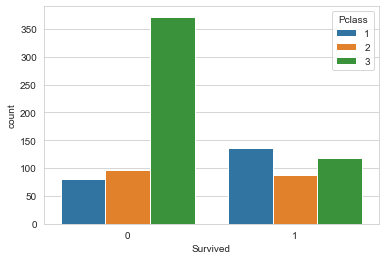

In [8]:
#Visualization of Survived and Pclass of Titanic
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=t_train)

# Preparing the Data/ Cleansing the unescessary Data

In [9]:
t_train.isnull().sum() #Finding the null values present in the data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
col=["Age"] #Changing the null values with age data
for cell in col:
    t_train[cell].fillna(t_train[cell].median(),inplace=True)
t_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
#Dropping the unused columns
t_train = t_train.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)
t_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
t_train['Embarked'].unique()
embarked = pd.get_dummies(t_train['Embarked'],drop_first=True) #Changing the value of Embarked into numerical
print(embarked)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]


In [13]:
sex = pd.get_dummies(t_train['Sex'],drop_first=True) #Making value of sex into numerical 1 and 0
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [14]:
t_train.drop(['Sex','Embarked'], axis=1, inplace=True) #Removing the column
t_train=pd.concat([t_train,sex,embarked],axis=1)
t_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Choose a fitting machine learning model

In [15]:
from sklearn.model_selection import train_test_split #train and test libraries
from sklearn.preprocessing import MinMaxScaler #Libraries that scales the values between min and max

Y= t_train["Survived"]
X= t_train.drop("Survived", axis=1)
X_train,X_test , Y_train, Y_test = train_test_split (X,Y,test_size= 0.2, random_state=150)

scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [16]:
#import the needed libraries
from sklearn.svm import SVC #Import svm model
from sklearn.neighbors import KNeighborsClassifier # Using KNeighbors to the dataset
from sklearn.neural_network import MLPClassifier #Using Multilayer Perceptron to the dataset
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score



In [17]:
svc=SVC(kernel='rbf',random_state=0)
svc.fit(X_train,Y_train)
svc_score=round(svc.score(X_train, Y_train)*100,2)
print("Accuracy for SVC is: ",svc_score)

Accuracy for SVC is:  80.34


In [18]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, Y_train)
KNN_pred = KNN.predict(X_test)
knscore=round(KNN.score(X_train,Y_train)*100,2)
print("Accuracy for KNN is: ",knscore)

Accuracy for KNN is:  82.16


In [19]:
#Neural Network using MLP
mlp = MLPClassifier(random_state=42,max_iter=1000)
mlp.fit(X_train, Y_train)
prediction = mlp.predict(X_test)
mlp_classifier= round(mlp.score(X_train, Y_train) * 100, 2)
print("Accuracy",round(mlp_classifier,2,), "%")

Accuracy 83.85 %


# Evaluation of Data

In [20]:
model_output = pd.DataFrame({
    'Model': ['SVC','KNN', 'MLP Classifier'],
    'Accuracy Values': [svc_score,knscore, mlp_classifier]})

model_output = model_output.sort_values(by='Accuracy Values', ascending=False)
model_output = model_output.set_index('Accuracy Values')
model_output.head()

,Model
Accuracy Values,
83.85,MLP Classifier
82.16,KNN
80.34,SVC


# Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.5,1,10,50,100,1000],'gamma':[1,0.1,0.001,0.00001,0.000001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#Finding the best parameters for SvC
grid.fit(X_train,Y_train)
grid_predictions=grid.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.5, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.5

[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END .................................C=100, gamma=0.001; total time=   0.0s
[CV] END .................................C=100, gamma=0.001; total time=   0.0s
[CV] END .................................C=100, gamma=0.001; total time=   0.0s
[CV] END .................................C=100, gamma=0.001; total time=   0.0s
[CV] END .................................C=100, gamma=0.001; total time=   0.0s
[CV] END .................................C=100, gamma=1e-05; total time=   0.0s
[CV] END .................................C=100, gamma=1e-05; total time=   0.0s
[CV] END ...................

In [22]:
print("best parameters: ",grid.best_params_)
print("best estimators: ",grid.best_estimator_)

best parameters:  {'C': 1000, 'gamma': 0.1}
best estimators:  SVC(C=1000, gamma=0.1)


In [23]:
svc =SVC(C =1000, gamma = 0.0001, kernel='rbf')
svc.fit(X_train, Y_train)
svm_pred = svc.predict(X_test)
svcscore=accuracy_score(Y_test, svm_pred)
print("SVM T Accuracy:",accuracy_score(Y_test, svm_pred)) 

SVM T Accuracy: 0.8100558659217877


In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
knn = range(1, 21, 2)
#Finding the best parameters for KNN
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=knn,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

Best: 0.794503 using {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}


In [25]:
kn= KNeighborsClassifier(n_neighbors=13, weights="uniform", metric="manhattan")
kn.fit(X_train, Y_train)
pred_kn = kn.predict(X_test)
pred_KN = accuracy_score(Y_test, pred_kn)
print("KNN T Accuracy:",pred_KN)

KNN T Accuracy: 0.8547486033519553


In [26]:

from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV #import gridsearch
hidden_layer_sizes = [5],
activation = ["identity", "logistic", "tanh", "relu"]
solver = ["lbfgs", "sgd", "adam"]
learning_rate = ["constant", "invscaling", "adaptive"]
#Finding the best parameters for MLP
grid = dict(hidden_layer_sizes=hidden_layer_sizes,activation=activation,solver=solver,learning_rate=learning_rate)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=mlp, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
print(grid_result.best_params_)

Best: 0.796375 using {'activation': 'relu', 'hidden_layer_sizes': [5], 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.779995 with: {'activation': 'identity', 'hidden_layer_sizes': [5], 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.786541 with: {'activation': 'identity', 'hidden_layer_sizes': [5], 'learning_rate': 'constant', 'solver': 'sgd'}
0.777660 with: {'activation': 'identity', 'hidden_layer_sizes': [5], 'learning_rate': 'constant', 'solver': 'adam'}
0.779995 with: {'activation': 'identity', 'hidden_layer_sizes': [5], 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.383412 with: {'activation': 'identity', 'hidden_layer_sizes': [5], 'learning_rate': 'invscaling', 'solver': 'sgd'}
0.777660 with: {'activation': 'identity', 'hidden_layer_sizes': [5], 'learning_rate': 'invscaling', 'solver': 'adam'}
0.779995 with: {'activation': 'identity', 'hidden_layer_sizes': [5], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.784683 with: {'activation': 'identity', 'hidden_layer_sizes'

In [27]:
MLP = MLPClassifier(activation="logistic", hidden_layer_sizes=5, learning_rate="constant", solver="adam",random_state=42, max_iter=1000)
MLP.fit(X_train, Y_train)
MLPred= MLP.predict(X_test)
Mlpt= accuracy_score(Y_test, MLPred)
print("MPL T Accuracy:",Mlpt)

MPL T Accuracy: 0.8379888268156425


In [28]:
model_output = pd.DataFrame({
    'Model': ['SVC','KNN', 'MLP Classifier'],
    'Accuracy Values': [svc_score,knscore, mlp_classifier],
    'Tune Values':[svcscore,pred_KN,Mlpt]})

model_output = model_output.sort_values(by='Accuracy Values', ascending=False)
model_output = model_output.set_index('Accuracy Values')
model_output.head()

,Model,Tune Values
Accuracy Values,,
83.85,MLP Classifier,0.837989
82.16,KNN,0.854749
80.34,SVC,0.810056


# Prediction


In [29]:
t_test=pd.read_csv("test.csv")
t_test = t_test.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1) #Removing the unecessary data
col=["Age","Fare"]
for cell in col:
    t_test[cell].fillna(t_test[cell].median(),inplace=True)
t_test.isnull().sum().sort_values(ascending=False)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
t_test['Embarked'].unique()
embarked = pd.get_dummies(t_test['Embarked'],drop_first=True)
print(embarked)
sex = pd.get_dummies(t_test['Sex'],drop_first=True)
print(sex)


     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[418 rows x 2 columns]
     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[418 rows x 1 columns]


In [31]:
sex = pd.get_dummies(t_test['Sex'],drop_first=True)
print(sex)

     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[418 rows x 1 columns]


In [32]:
t_test.drop(['Sex','Embarked'], axis=1, inplace=True)
t_test=pd.concat([t_test,sex,embarked],axis=1)
t_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [33]:
svcp = svc.predict(t_test)
print(svcp)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [34]:
knnp = kn.predict(t_test)
print(knnp)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [35]:
mplp = MLP.predict(t_test)
print(mplp)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
